Part 1: Data Loading and Exploration 
        1. Load the California Housing Prices dataset from Kaggle. 
        2. Convert the dataset into a Pandas DataFrame for easier manipulation. 
        3. Display the first five rows and get basic statistics like mean, median, and standard deviation for each feature.
        4. Explore the relationships between features using: 
                o Histograms for individual features. 
                o A heatmap to show correlations between features. 
                            
Part 2: Preprocessing 
        1. Check for missing values and handle them (e.g., fill, drop, or impute). 
        2. Normalize/standardize numerical features using techniques like Min-Max scaling or Standard Scaling. 
        3. Split the dataset into training (80%) and testing (20%) sets. 
                                                              
Part 3: Model Training 
        1. Train a Linear Regression model on the dataset. 
        2. Use the training data to fit the model.

Part 4: Model Evaluation
        1. Predict the target variable (housing prices) for the test data. 
        2. Evaluate the model using metrics like: 
                o Mean Absolute Error (MAE) 
                o Mean Squared Error (MSE) 
                o R-squared Score 
        3. Plot the predicted vs. actual housing prices using a scatter plot. 
                                                              
Part 5: Experimentation 
        1. Train at least one additional regression model (e.g., Decision Tree Regressor or Random Forest Regressor). 
        2. Compare the performance of both models using the evaluation metrics.

# Importing libraries

In [349]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Loading Dataset

In [269]:
# 1. Load the California Housing Prices dataset from Kaggle. 2. Convert the dataset into a Pandas DataFrame for easier manipulation.
df = pd.read_csv("housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Exploring Dataset

In [272]:
#3. Display the first five rows and get basic statistics like mean, median, and standard deviation for each featur
print("The first five rows")
df.head(5)

The first five rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [274]:
print("The basic statistics like mean, median, and standard deviation for each featur ")
df.describe()

The basic statistics like mean, median, and standard deviation for each featur 


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Visualizing Dataset

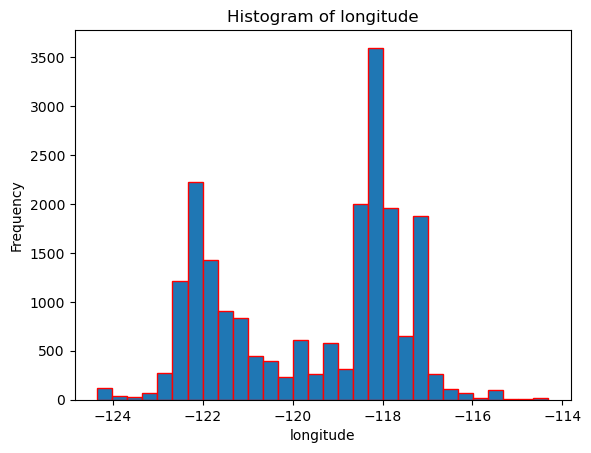

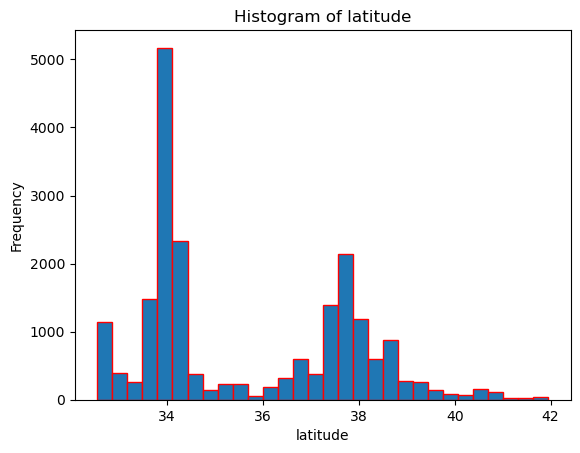

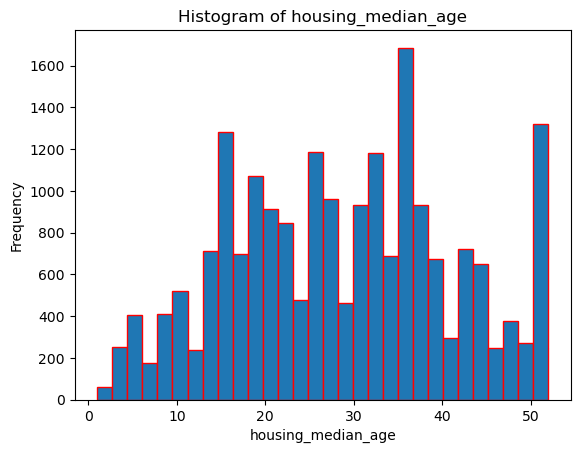

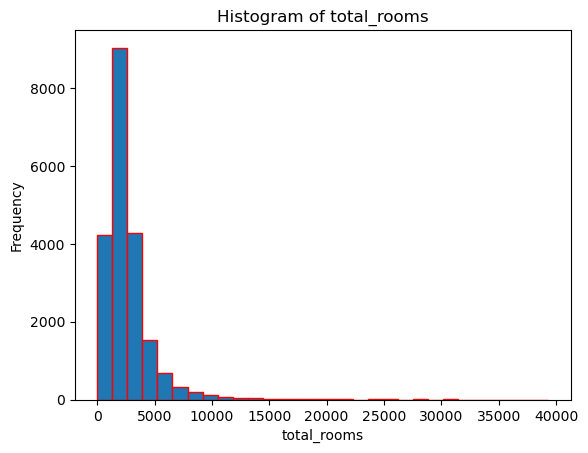

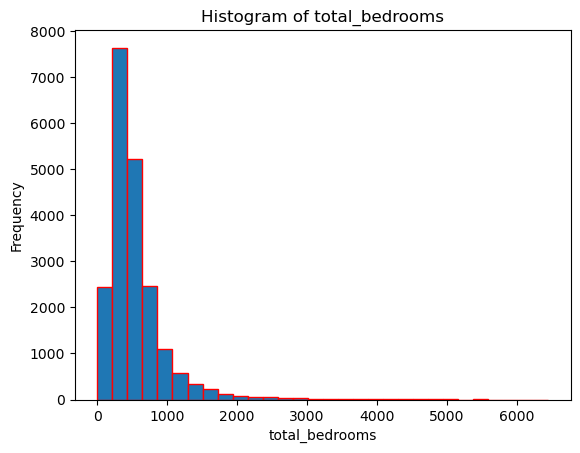

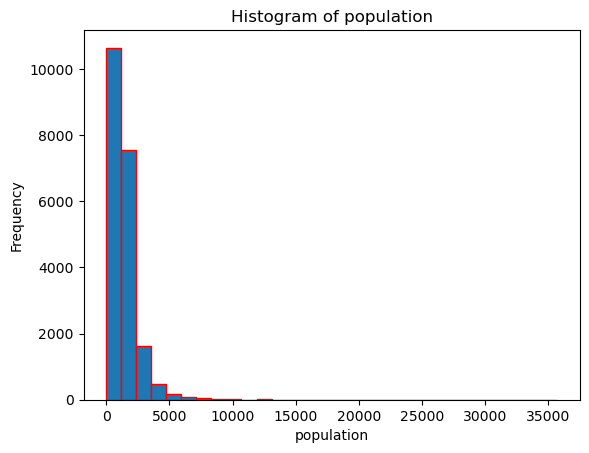

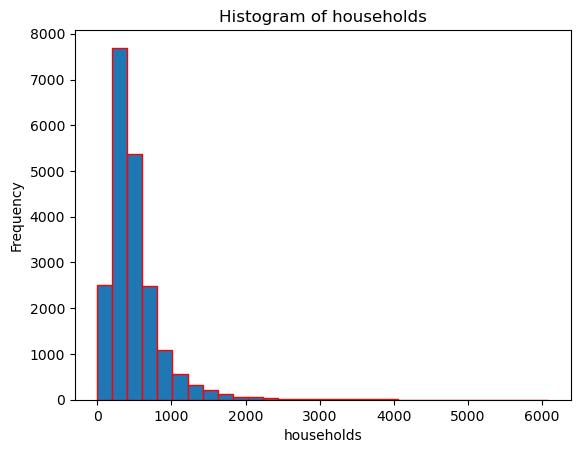

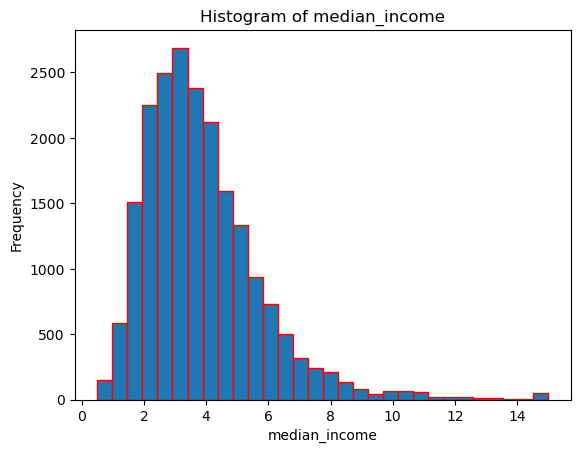

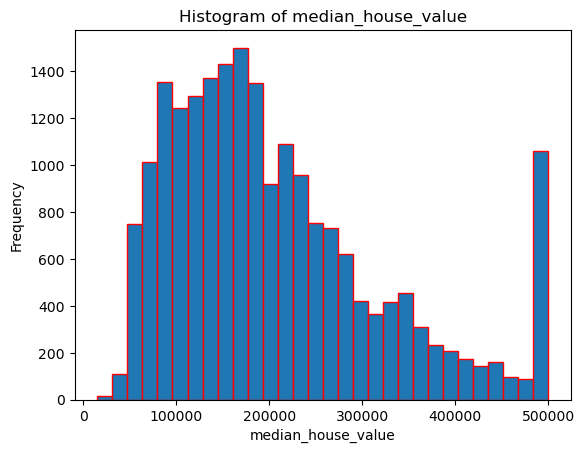

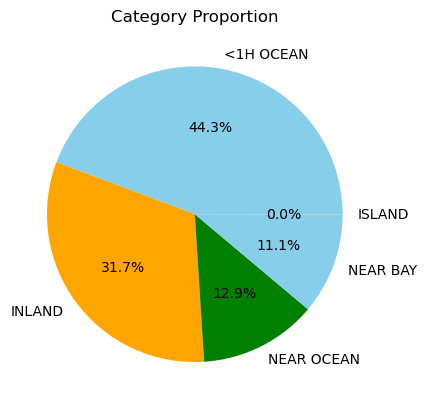

In [277]:
# Histogtam for individual feature
numerical_feature = df.select_dtypes(include = ["float64"]).columns

for feature in numerical_feature:
    plt.hist(df[feature],bins = 30 ,edgecolor = 'red')
    plt.xlabel (feature)
    plt.ylabel ("Frequency")
    plt.title("Histogram of %s" % feature)
    plt.show()

# Pie Chart for Categorical column
df["ocean_proximity"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'])
plt.ylabel("")  # Hide ylabel
plt.title("Category Proportion")
plt.show()


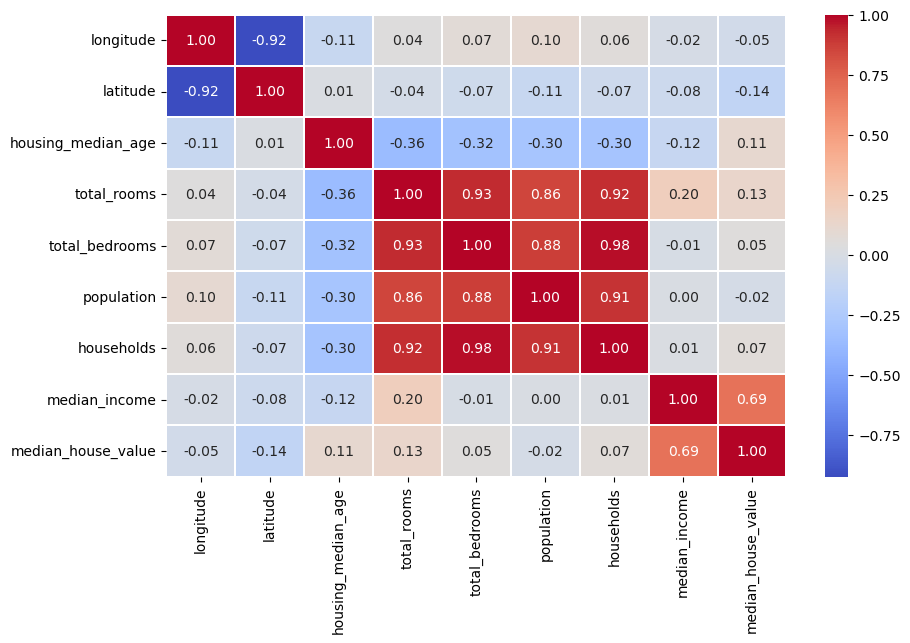

In [278]:
#A heatmap to show correlations between features.
df_numeric = df.select_dtypes(include=['float64'])
corr_matrix = df_numeric.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",linewidths=0.2,fmt=".2f",square=False)
plt.show()


# Data Preprocessing

In [280]:
#Check for missing values and handle them (e.g., fill, drop, or impute)
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [281]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].mean())

# Data Normzalization Standarization

In [283]:
# Normalizing the numerical features

numerical_features = ["longitude", "latitude", "housing_median_age", "total_rooms",
                      "total_bedrooms", "population", "households", "median_income"]

# 1 Min-Max Scaling (Values between 0 and 1)
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numerical_features] = minmax_scaler.fit_transform(df[numerical_features])
print("Min-Max Scaled Data:")
print(df_minmax.head())

Min-Max Scaled Data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.019863   
1   0.212151  0.565356            0.392157     0.180503        0.171477   
2   0.210159  0.564293            1.000000     0.037260        0.029330   
3   0.209163  0.564293            1.000000     0.032352        0.036313   
4   0.209163  0.564293            1.000000     0.041330        0.043296   

   population  households  median_income  median_house_value ocean_proximity  
0    0.008941    0.020556       0.539668            452600.0        NEAR BAY  
1    0.067210    0.186976       0.538027            358500.0        NEAR BAY  
2    0.013818    0.028943       0.466028            352100.0        NEAR BAY  
3    0.015555    0.035849       0.354699            341300.0        NEAR BAY  
4    0.015752    0.042427       0.230776            342200.0        NEAR BAY  


In [284]:
#2 Standarization (Z-score normalization, mean=0, std=1)

standard = StandardScaler()
df_standard = df.copy()
df_standard[numerical_features] = standard.fit_transform(df[numerical_features])
print("Standard Scaled Data:")
print(df_standard.head())

Standard Scaled Data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.975228   
1  -1.322844  1.043185           -0.607019     2.045890        1.355088   
2  -1.332827  1.038503            1.856182    -0.535746       -0.829732   
3  -1.337818  1.038503            1.856182    -0.624215       -0.722399   
4  -1.337818  1.038503            1.856182    -0.462404       -0.615066   

   population  households  median_income  median_house_value ocean_proximity  
0   -0.974429   -0.977033       2.344766            452600.0        NEAR BAY  
1    0.861439    1.669961       2.332238            358500.0        NEAR BAY  
2   -0.820777   -0.843637       1.782699            352100.0        NEAR BAY  
3   -0.766028   -0.733781       0.932968            341300.0        NEAR BAY  
4   -0.759847   -0.629157      -0.012881            342200.0        NEAR BAY  


# One Hot Encoding 

In [288]:
# Converting categorical Data into numerical

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_data = encoder.fit_transform(df[["ocean_proximity"]])


In [297]:
# Convert encoded data to DataFrame
encoded_columns = encoder.get_feature_names_out(["ocean_proximity"])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)

# Merge encoded features
df = df.drop(columns=["ocean_proximity"]).join(encoded_df)

# Display first few rows
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1   

# Train Test and Split 

In [340]:
X = df.drop(columns=["median_house_value"])  
y = df["median_house_value"]  
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64

# Model Training

In [312]:
# Initialize Decision Tree Model
model = LinearRegression()

In [314]:
# Train the model on the training set
model.fit(X_train,Y_train)

LinearRegression()

In [342]:
# Predict the target variable (housing prices) for the test data. 
y_pred = model.predict(X_test)
print("The predicted value:")
y_pred


The predicted value:


array([ 64629.45079786, 134799.34083607, 266063.38139054, ...,
       439180.98341181, 120797.55240621, 183386.04993584])

In [318]:
print("Model training complete!")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model training complete!
Model Coefficients: [-2.68382734e+04 -2.54683520e+04  1.10218508e+03 -6.02150567e+00
  1.02789395e+02 -3.81729064e+01  4.82527528e+01  3.94739752e+04
 -1.89265829e+04 -5.87132390e+04  1.17198490e+05 -2.40632251e+04
 -1.54954428e+04]
Model Intercept: -2256620.7988546593


# Model Evaluation

In [326]:
# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Absolute Error (MAE): 50701.78
Mean Squared Error (MSE): 4904399775.95
R-squared Score: 0.63


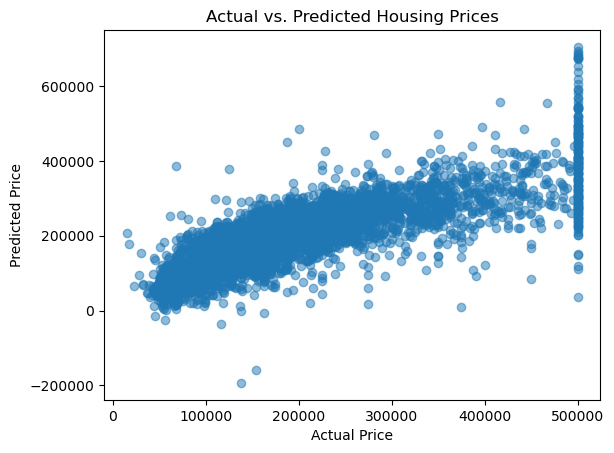

In [346]:
# Plot the predicted vs. actual housing prices using a scatter plot.
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Housing Prices")
plt.show()

# Experimentation

In [351]:
# Initialize Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)

In [353]:
# Train the model on the training set
dt_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [355]:
# Predict on test data
y_pred_dt = dt_model.predict(X_test)
print("The predicted value:")
y_pred

The predicted value:


array([ 64629.45079786, 134799.34083607, 266063.38139054, ...,
       439180.98341181, 120797.55240621, 183386.04993584])

In [361]:
# Evaluate Linear Regression
mae_dt = mean_absolute_error(Y_test, y_pred_dt)
mse_dt = mean_squared_error(Y_test, y_pred_dt)
r2_dt = r2_score(Y_test, y_pred_dt)

# Print results
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"R-squared Score: {r2_dt:.2f}")

Mean Absolute Error (MAE): 43655.37
Mean Squared Error (MSE): 4790624903.43
R-squared Score: 0.63


In [363]:
# Print Comparison
print("Model Performance Comparison:")
print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}")
print(f"Decision Tree Regressor - MAE: {mae_dt}, MSE: {mse_dt}, R²: {r2_dt}")

Model Performance Comparison:
Linear Regression - MAE: 50701.77903133029, MSE: 4904399775.9493, R²: 0.6257351821159687
Decision Tree Regressor - MAE: 43655.37160852713, MSE: 4790624903.433624, R²: 0.6344175762696174


Text(0.5, 1.0, 'Decision Tree Predictions')

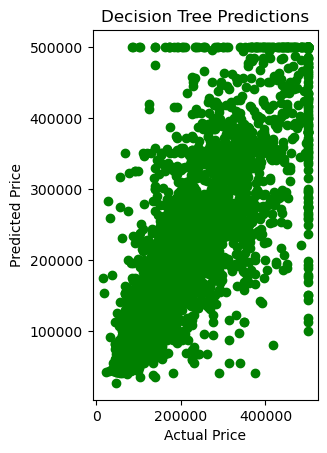

In [373]:
# Scatter Plot for Decision Tree
plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_pred_dt, color="green")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree Predictions")

In [377]:
# Random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)

# Make predictions
Y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

# Print Model Performance
print("Random Forest Regressor Performance:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R²: {r2_rf}")

# Compare with other models
print("\nModel Performance Comparison:")
print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}")
print(f"Decision Tree Regressor - MAE: {mae_dt}, MSE: {mse_dt}, R²: {r2_dt}")
print(f"Random Forest Regressor - MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}")


Random Forest Regressor Performance:
MAE: 31667.989481589146
MSE: 2397315306.588798
R²: 0.8170559461667481

Model Performance Comparison:
Linear Regression - MAE: 50701.77903133029, MSE: 4904399775.9493, R²: 0.6257351821159687
Decision Tree Regressor - MAE: 43655.37160852713, MSE: 4790624903.433624, R²: 0.6344175762696174
Random Forest Regressor - MAE: 31667.989481589146, MSE: 2397315306.588798, R²: 0.8170559461667481
